# Percentile / Quantile Cutoff Method
This method directly defines outliers as the extreme values beyond specific percentiles of the data distribution.



- Lower outliers: Values below the p-th percentile

- Upper outliers: Values above the (100-p)-th percentile

### Common Cutoffs:

1% cutoff: p = 1 (identifies top and bottom 1% as outliers)

5% cutoff: p = 5 (identifies top and bottom 5% as outliers)

2.5% cutoff: p = 2.5 (identifies top and bottom 2.5% as outliers)

### How It Works
Choose your cutoff percentage (e.g., 1%, 5%)

Calculate the percentile thresholds:

Lower bound = p-th percentile

Upper bound = (100-p)-th percentile

Identify outliers: Any values outside these bounds

Formulas:


```Lower Bound = percentile(data, p)```
```Upper Bound = percentile(data, 100-p)```
### Step-by-Step Example
Let's use a dataset of house prices:

``` Dataset: [150k, 180k, 200k, 220k, 240k, 260k, 280k, 300k, 320k, 350k, 380k, 400k, 450k, 500k, 800k, 1.2M, 2.5M]```
``` bash
Using 5% Cutoff (p = 5):

Step 1: Calculate 5th and 95th Percentiles

5th percentile = value at 5% of sorted data

95th percentile = value at 95% of sorted data

Step 2: Find Threshold Values


Sorted data (17 values):
[150k, 180k, 200k, 220k, 240k, 260k, 280k, 300k, 320k, 350k, 380k, 400k, 450k, 500k, 800k, 1.2M, 2.5M]

5th percentile position = 0.05 × 17 = 0.85 → between 1st and 2nd values
5th percentile ≈ 150k + 0.85×(180k-150k) = 175.5k

95th percentile position = 0.95 × 17 = 16.15 → between 16th and 17th values  
95th percentile ≈ 1.2M + 0.15×(2.5M-1.2M) = 1.395M
Step 3: Identify Outliers

Lower outliers: Values < 175.5k → 150k is an outlier

Upper outliers: Values > 1.395M → 2.5M is an outlier
```

Different Percentile Calculation Methods
There are several ways to calculate percentiles:


- Method 1: Linear Interpolation (Most Common)


```position = (p/100) * (n - 1) + 1```

- Method 2: Nearest Rank


``` position = ceil((p/100) * n)```

- Method 3: Hyndman-Fan (used in pandas, R)


``` position = (p/100) * (n + 1/3) + 1/3 ```
When to Use Percentile Cutoff
Excellent for:

Non-normal distributions (no distribution assumptions)

Skewed data (works well with asymmetric distributions)

Simple, intuitive rules (easy to explain to non-technical stakeholders)

Large datasets where extreme percentages make sense

Domain-specific cutoffs (e.g., "remove top 1% of transactions")

Advantages:

 No distribution assumptions

 Extremely simple to implement

 Intuitive and explainable

 Consistent across datasets

 Handles skewed data well

Limitations:

 Arbitrary cutoff (why 1%? why not 2%?)

 May remove valid extreme values

 Fixed percentage doesn't adapt to data spread

 Can be too aggressive/conservative depending on dataset size

### Common Cutoff Strategies
- Conservative (Strict):

1% cutoff: Removes only the most extreme values

Use when: Data quality is high, few expected outliers

- Moderate:

2.5% cutoff: Balanced approach

Use when: Typical real-world scenarios

- Aggressive:

5% cutoff: Removes more potential outliers

Use when: Data is noisy, many expected anomalies


=== Example 1: House Prices (Skewed Data) ===
5% Cutoff - Lower: $174,000, Upper: $1,460,000
Outliers: ['$150,000', '$2,500,000']
2.5% Cutoff - Lower: $162,000, Upper: $1,980,000
Outliers: ['$150,000', '$2,500,000']

=== Example 2: Normal Distribution ===
1% Cutoff - Lower: 67.05, Upper: 136.83
Outliers detected: 22
Outlier values: ['60.7', '136.9', '140.8', '157.8', '51.4', '65.5', '146.2', '62.9', '66.8', '59.5', '138.6', '60.2', '139.5', '138.4', '136.8', '137.9', '67.0', '63.6', '30.0', '40.0', '180.0', '200.0']

=== Comparing Different Cutoffs ===
0.5% cutoff: 2 outliers (11.8%) [Lower: $152,400, Upper: $2,396,000]
1% cutoff: 2 outliers (11.8%) [Lower: $154,800, Upper: $2,292,000]
2% cutoff: 2 outliers (11.8%) [Lower: $159,600, Upper: $2,084,000]
2.5% cutoff: 2 outliers (11.8%) [Lower: $162,000, Upper: $1,980,000]
5% cutoff: 2 outliers (11.8%) [Lower: $174,000, Upper: $1,460,000]


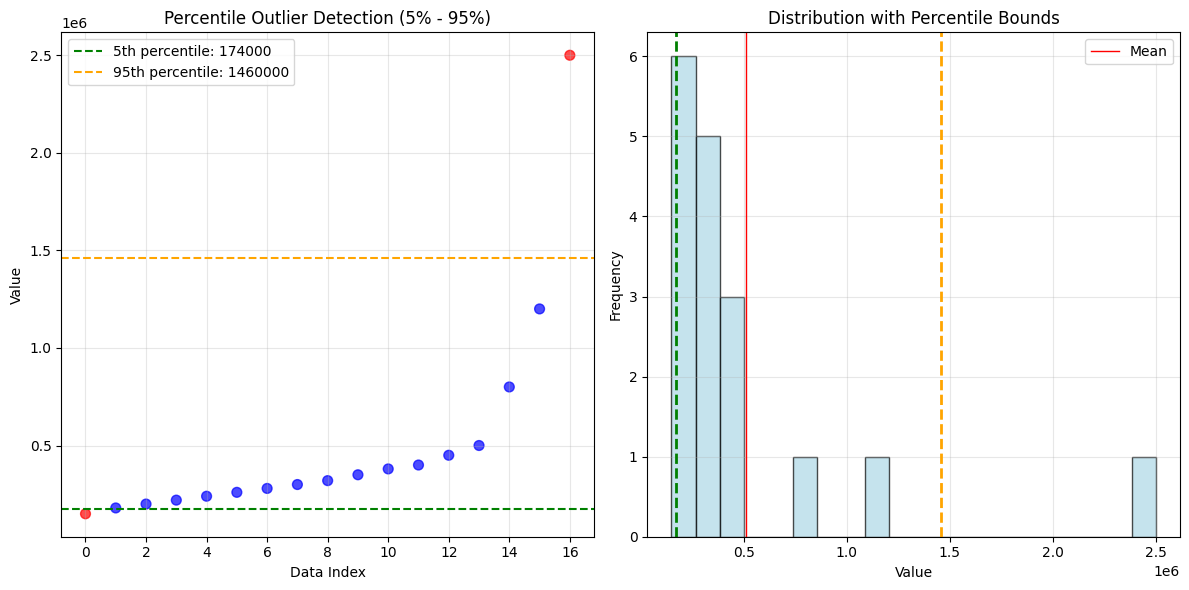


=== Winsorization Example ===
Original: [10, 15, 18, 20, 22, 25, 28, 30, 35, 40, 200]
Winsorized: [15 15 18 20 22 25 28 30 35 40 40]
Bounds: Lower=15.0, Upper=40.0
Values capped: 40 -> 40, 200 -> 40


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def percentile_outlier_detection(data, lower_percentile=1, upper_percentile=99):
    """
    Detect outliers using percentile cutoff method
    """
    data = np.array(data)
    
    # Calculate percentile bounds
    lower_bound = np.percentile(data, lower_percentile)
    upper_bound = np.percentile(data, upper_percentile)
    
    # Identify outliers
    lower_outliers = data[data < lower_bound]
    upper_outliers = data[data > upper_bound]
    all_outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    # Get indices of outliers
    outlier_indices = np.where((data < lower_bound) | (data > upper_bound))[0]
    
    return {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'lower_outliers': lower_outliers,
        'upper_outliers': upper_outliers,
        'all_outliers': all_outliers,
        'outlier_indices': outlier_indices,
        'clean_data': data[(data >= lower_bound) & (data <= upper_bound)]
    }

# Example 1: House Prices (Skewed Data)
print("=== Example 1: House Prices (Skewed Data) ===")
house_prices = [150000, 180000, 200000, 220000, 240000, 260000, 280000, 
                300000, 320000, 350000, 380000, 400000, 450000, 500000, 
                800000, 1200000, 2500000]

result_1pct = percentile_outlier_detection(house_prices, 5, 95)
result_2pct = percentile_outlier_detection(house_prices, 2.5, 97.5)

print(f"5% Cutoff - Lower: ${result_1pct['lower_bound']:,.0f}, Upper: ${result_1pct['upper_bound']:,.0f}")
print(f"Outliers: {[f'${x:,.0f}' for x in result_1pct['all_outliers']]}")
print(f"2.5% Cutoff - Lower: ${result_2pct['lower_bound']:,.0f}, Upper: ${result_2pct['upper_bound']:,.0f}")
print(f"Outliers: {[f'${x:,.0f}' for x in result_2pct['all_outliers']]}")

# Example 2: Normal Distribution
print("\n=== Example 2: Normal Distribution ===")
np.random.seed(42)
normal_data = np.random.normal(100, 15, 1000)
# Add some outliers
normal_data = np.append(normal_data, [30, 40, 180, 200])

result_normal = percentile_outlier_detection(normal_data, 1, 99)
print(f"1% Cutoff - Lower: {result_normal['lower_bound']:.2f}, Upper: {result_normal['upper_bound']:.2f}")
print(f"Outliers detected: {len(result_normal['all_outliers'])}")
print(f"Outlier values: {[f'{x:.1f}' for x in result_normal['all_outliers']]}")

# Example 3: Comparing Different Cutoffs
def compare_percentile_cutoffs(data, cutoffs):
    """
    Compare different percentile cutoffs
    """
    results = {}
    
    for cutoff in cutoffs:
        lower_p = cutoff
        upper_p = 100 - cutoff
        result = percentile_outlier_detection(data, lower_p, upper_p)
        results[cutoff] = {
            'lower_bound': result['lower_bound'],
            'upper_bound': result['upper_bound'],
            'outliers_count': len(result['all_outliers']),
            'outliers_percentage': len(result['all_outliers']) / len(data) * 100
        }
    
    return results

# Test different cutoffs
print("\n=== Comparing Different Cutoffs ===")
cutoffs_to_test = [0.5, 1, 2, 2.5, 5]
comparison = compare_percentile_cutoffs(house_prices, cutoffs_to_test)

for cutoff, stats in comparison.items():
    print(f"{cutoff}% cutoff: {stats['outliers_count']} outliers ({stats['outliers_percentage']:.1f}%) "
          f"[Lower: ${stats['lower_bound']:,.0f}, Upper: ${stats['upper_bound']:,.0f}]")

# Visualization
def plot_percentile_outliers(data, lower_p=1, upper_p=99):
    """
    Visualize percentile-based outlier detection
    """
    result = percentile_outlier_detection(data, lower_p, upper_p)
    
    plt.figure(figsize=(12, 6))
    
    # Plot 1: Original data with outliers highlighted
    plt.subplot(1, 2, 1)
    colors = ['red' if x in result['all_outliers'] else 'blue' for x in data]
    plt.scatter(range(len(data)), data, c=colors, alpha=0.7, s=50)
    plt.axhline(y=result['lower_bound'], color='green', linestyle='--', 
                label=f'{lower_p}th percentile: {result["lower_bound"]:.0f}')
    plt.axhline(y=result['upper_bound'], color='orange', linestyle='--', 
                label=f'{upper_p}th percentile: {result["upper_bound"]:.0f}')
    plt.title(f'Percentile Outlier Detection ({lower_p}% - {upper_p}%)')
    plt.xlabel('Data Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 2: Distribution with bounds
    plt.subplot(1, 2, 2)
    plt.hist(data, bins=20, alpha=0.7, color='lightblue', edgecolor='black')
    plt.axvline(result['lower_bound'], color='green', linestyle='--', linewidth=2)
    plt.axvline(result['upper_bound'], color='orange', linestyle='--', linewidth=2)
    plt.axvline(np.mean(data), color='red', linestyle='-', linewidth=1, label='Mean')
    plt.title('Distribution with Percentile Bounds')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return result

# Visualize the house prices example
result_viz = plot_percentile_outliers(house_prices, 5, 95)

# Practical application: Winsorization using percentiles
def winsorize_data(data, lower_p=1, upper_p=99):
    """
    Cap outliers using percentile-based winsorization
    """
    data = np.array(data)
    lower_bound = np.percentile(data, lower_p)
    upper_bound = np.percentile(data, upper_p)
    
    # Cap the outliers
    winsorized = np.copy(data)
    winsorized[winsorized < lower_bound] = lower_bound
    winsorized[winsorized > upper_bound] = upper_bound
    
    return winsorized, lower_bound, upper_bound

print("\n=== Winsorization Example ===")
original_data = [10, 15, 18, 20, 22, 25, 28, 30, 35, 40, 200]
winsorized, lower, upper = winsorize_data(original_data, 10, 90)

print(f"Original: {original_data}")
print(f"Winsorized: {winsorized}")
print(f"Bounds: Lower={lower}, Upper={upper}")
print(f"Values capped: {original_data[9]} -> {winsorized[9]}, {original_data[10]} -> {winsorized[10]}")